In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\Jalpa\Desktop\DATA\Advertising.csv")
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
X = df.drop('Sales', axis=1)
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [8]:
y = df['Sales']
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [10]:
poly_conv = PolynomialFeatures(degree=3, include_bias=False)

In [12]:
final_model = LinearRegression()

In [13]:
poly_features = poly_conv.fit_transform(X)
poly_features

array([[2.30100000e+02, 3.78000000e+01, 6.92000000e+01, ...,
        9.88757280e+04, 1.81010592e+05, 3.31373888e+05],
       [4.45000000e+01, 3.93000000e+01, 4.51000000e+01, ...,
        6.96564990e+04, 7.99365930e+04, 9.17338510e+04],
       [1.72000000e+01, 4.59000000e+01, 6.93000000e+01, ...,
        1.46001933e+05, 2.20434291e+05, 3.32812557e+05],
       ...,
       [1.77000000e+02, 9.30000000e+00, 6.40000000e+00, ...,
        5.53536000e+02, 3.80928000e+02, 2.62144000e+02],
       [2.83600000e+02, 4.20000000e+01, 6.62000000e+01, ...,
        1.16776800e+05, 1.84062480e+05, 2.90117528e+05],
       [2.32100000e+02, 8.60000000e+00, 8.70000000e+00, ...,
        6.43452000e+02, 6.50934000e+02, 6.58503000e+02]])

In [14]:
X.shape 

(200, 3)

In [15]:
poly_features.shape

(200, 19)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                    poly_features, y, test_size=0.33, random_state=101)

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler() #it applies z score normalisation(standardisation)

In [19]:
scaler.fit(X_train)

StandardScaler()

In [20]:
scaled_X_train = scaler.transform(X_train)

In [21]:
scaled_X_test = scaler.transform(X_test)

In [22]:
X_train[0]

array([1.87800000e+02, 2.11000000e+01, 9.50000000e+00, 3.52688400e+04,
       3.96258000e+03, 1.78410000e+03, 4.45210000e+02, 2.00450000e+02,
       9.02500000e+01, 6.62348815e+06, 7.44172524e+05, 3.35053980e+05,
       8.36104380e+04, 3.76445100e+04, 1.69489500e+04, 9.39393100e+03,
       4.22949500e+03, 1.90427500e+03, 8.57375000e+02])

In [23]:
scaled_X_train

array([[ 0.455913  , -0.15469995, -0.98899258, ..., -0.60618091,
        -0.56426029, -0.5063835 ],
       [-0.84432792,  1.60997604,  0.21389931, ...,  1.27808026,
         0.25379368, -0.22928072],
       [-0.2808111 ,  0.93019813,  2.36467003, ...,  2.13064753,
         2.9262847 ,  2.91162153],
       ...,
       [ 1.07281562, -1.32199535,  0.32937694, ..., -0.70151704,
        -0.50832904, -0.16601335],
       [ 0.77504147,  0.04442691, -1.2536288 , ..., -0.6570423 ,
        -0.58737703, -0.51185147],
       [ 0.16525695,  0.56627662,  1.09922775, ...,  0.67742414,
         0.75141387,  0.50797559]])

In [24]:
from sklearn.linear_model import Ridge

In [25]:
ridge_model = Ridge(alpha = 5)

In [26]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=5)

In [27]:
test_predictions = ridge_model.predict(X_test)

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE = mean_absolute_error(y_test, test_predictions)
MAE

0.3931122136987665

In [29]:
RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))
RMSE

0.5578348973355702

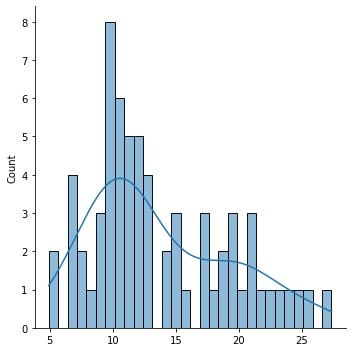

In [30]:
sns.displot(test_predictions, bins=30, kde=True)

Text(0.5, 1.0, 'Newspaper Spend')

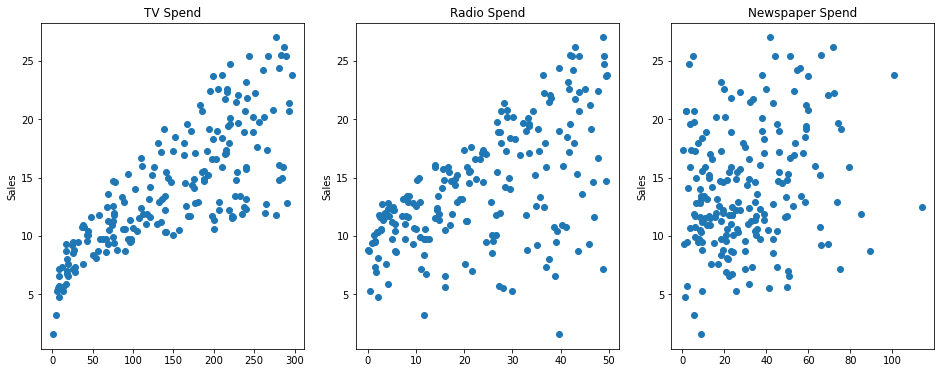

In [31]:
fig,axes = plt.subplots(nrows=1, ncols=3, figsize=(16,6))

axes[0].plot(df['TV'], df['Sales'], 'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['Radio'], df['Sales'], 'o')
axes[1].set_ylabel("Sales")
axes[1].set_title("Radio Spend")

axes[2].plot(df['Newspaper'], df['Sales'], 'o')
axes[2].set_ylabel("Sales")
axes[2].set_title("Newspaper Spend")
#plt.tight_layout()